# Pair Programming Intro Regresión Lineal

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que

- Deberéis separar la X y la y.

- Deberéis crear el train y el test.

- Ajustar vuestro modelo.

In [20]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# 1º INTENTO: Regresión lineal con Label

In [4]:
df_label = pd.read_csv('../archivos/country_label.csv', index_col=0)
df_label.sample()

,basic,basic_boxcox,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,...,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,square_meter_incentre,monthly_salary,mortgage,country_encod
2473,130.77,14.045522,0.139205,-0.365741,-0.833333,-0.248555,-0.195652,-0.132727,0.034388,-0.180556,...,-0.0706,0.775738,-0.039187,0.159865,-0.325802,0.106897,-0.139572,0.061458,-0.586667,1


In [5]:
X = df_label.drop("basic_boxcox", axis = 1)
y = df_label["basic_boxcox"]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [7]:
lr = LinearRegression(n_jobs=-1)

In [9]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [10]:
y_predict_train = lr.predict(x_train)
y_predict_test = lr.predict(x_test)

In [12]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train), 'Type': ['Label']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test), 'Type': ['Label']*len(y_test)})
resultados_label = pd.concat([train_df,test_df], axis = 0)
resultados_label.head()

,Real,Predicted,Set,Type
1078,7.928162,9.305198,Train,Label
3858,17.542050,17.316157,Train,Label
2610,15.736142,15.166444,Train,Label
2086,13.252123,12.282654,Train,Label
2417,16.953020,15.672656,Train,Label


In [31]:
resultados_label['residuos'] = resultados_label['Real'] - resultados_label['Predicted']
resultados_label.head()

,Real,Predicted,Set,Type,residuos
1078,7.928162,9.305198,Train,Label,-1.377035
3858,17.542050,17.316157,Train,Label,0.225893
2610,15.736142,15.166444,Train,Label,0.569698
2086,13.252123,12.282654,Train,Label,0.969469
2417,16.953020,15.672656,Train,Label,1.280364


In [14]:
cv_scores_label = cross_validate(
                estimator = LinearRegression(),
                X         = X,
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores_label = pd.DataFrame(cv_scores_label)
cv_scores_label

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.056415,0.031723,0.913470,-1.105871
1,0.095796,0.007709,-6.060696,-12.233514
2,0.050169,0.037177,0.940485,-0.977211
3,0.058123,0.036322,0.942996,-0.970860
4,0.048817,0.026760,0.947534,-0.930971
5,0.084637,0.029322,0.952066,-0.769103
6,0.060977,0.013187,0.935730,-0.982130
7,0.033633,0.041594,0.936984,-0.877581
8,0.050617,0.031451,0.871610,-1.200072
9,0.106605,0.024956,0.910562,-1.080932


In [18]:
print(f'la media para el r2 es {cv_scores_label["test_r2"].mean()}')
print(f'la media para el RMSE es {abs(cv_scores_label["test_neg_root_mean_squared_error"].mean())}')

la media para el r2 es 0.22907404315486884
la media para el RMSE es 2.1128246863635165


In [37]:
resultados_metricas_label = {'MAE': [mean_absolute_error(y_test, y_predict_test), mean_absolute_error(y_train, y_predict_train)],
                'MSE': [mean_squared_error(y_test, y_predict_test), mean_squared_error(y_train, y_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_predict_test)), np.sqrt(mean_squared_error(y_train, y_predict_train))],
                'R2':  [r2_score(y_test, y_predict_test), r2_score(y_train, y_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion", "Linear Regression"],
                 "type": ['Label', 'Label']}

df_resultados_label = pd.DataFrame(resultados_metricas_label)

df_resultados_label

,MAE,MSE,RMSE,R2,set,modelo,type
0,0.697074,0.934351,0.966618,0.943369,test,Linear Regresion,Label
1,0.710062,1.056541,1.027882,0.936858,train,Linear Regression,Label


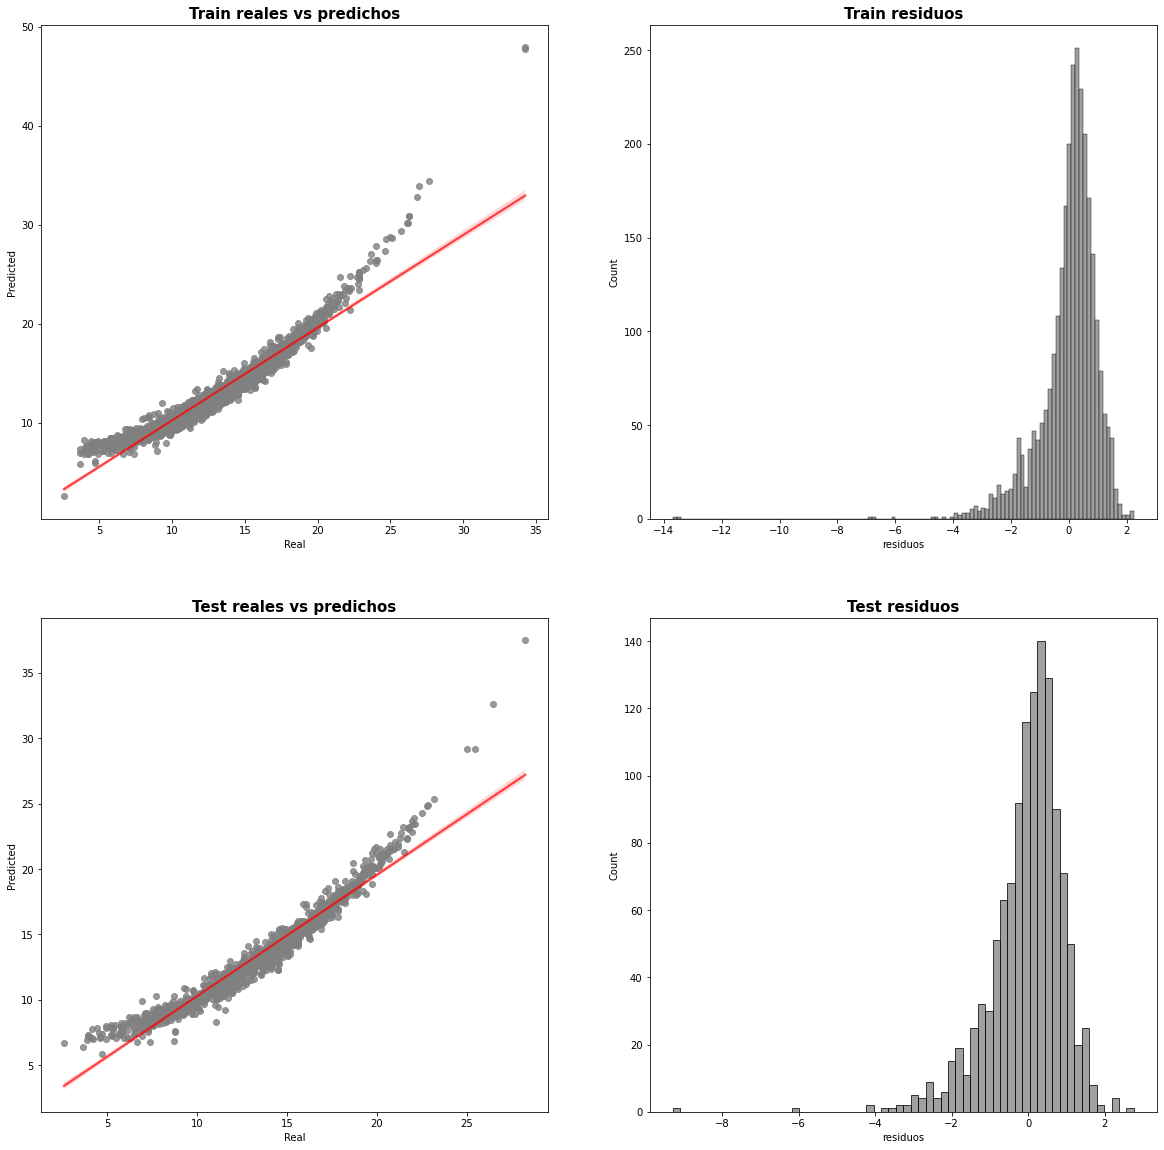

In [23]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados_label[resultados_label['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })



sns.regplot(data = resultados_label[resultados_label['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados_label[resultados_label['Set'] == "Train"],
             x="residuos",
             color ="grey",
            #  kde=True, 
             ax = ax[0,1])


sns.histplot(resultados_label[resultados_label['Set'] == "Test"],
             x="residuos",
             color = "grey",
            #  kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

# 2º INTENTO: Regresión lineal con Dummies

In [24]:
df_dummie = pd.read_csv('../archivos/country_dummie.csv', index_col=0)
df_dummie.sample()

,basic,basic_boxcox,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,...,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe
578,235.15,18.189757,0.599432,1.023148,-0.354167,1.913295,0.913043,0.587273,0.392022,0.527778,...,0,1,0,0,0,0,0,0,0,0


In [25]:
Xd = df_dummie.drop("basic_boxcox", axis = 1)
yd = df_dummie["basic_boxcox"]

In [26]:
xd_train, xd_test, yd_train, yd_test = train_test_split(Xd, yd, test_size = 0.3, random_state = 42)

In [27]:
lr.fit(xd_train, yd_train)

LinearRegression(n_jobs=-1)

In [28]:
yd_predict_train = lr.predict(xd_train)
yd_predict_test = lr.predict(xd_test)

In [29]:
traind_df = pd.DataFrame({'Real': yd_train, 'Predicted': yd_predict_train, 'Set': ['Train']*len(yd_train), 'Type': ['Dummie']*len(yd_train)})
testd_df  = pd.DataFrame({'Real': yd_test,  'Predicted': yd_predict_test,  'Set': ['Test']*len(yd_test), 'Type': ['Dummie']*len(yd_test)})
resultados_dummie = pd.concat([traind_df,testd_df], axis = 0)
resultados_dummie.head()

,Real,Predicted,Set,Type
1078,7.928162,9.229680,Train,Dummie
3858,17.542050,17.199803,Train,Dummie
2610,15.736142,15.185413,Train,Dummie
2086,13.252123,12.489626,Train,Dummie
2417,16.953020,15.712000,Train,Dummie


In [32]:
resultados_dummie['residuos'] = resultados_dummie['Real'] - resultados_dummie['Predicted']
resultados_dummie.head()

,Real,Predicted,Set,Type,residuos
1078,7.928162,9.229680,Train,Dummie,-1.301518
3858,17.542050,17.199803,Train,Dummie,0.342248
2610,15.736142,15.185413,Train,Dummie,0.550729
2086,13.252123,12.489626,Train,Dummie,0.762497
2417,16.953020,15.712000,Train,Dummie,1.241020


In [33]:
cv_scores_dummie = cross_validate(
                estimator = LinearRegression(),
                X         = Xd,
                y         = yd,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores_dummie = pd.DataFrame(cv_scores_dummie)
cv_scores_dummie

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.831826,0.094738,9.030614e-01,-1.170493e+00
1,0.404070,0.053470,-5.756709e+17,-3.493129e+09
2,0.456338,0.077435,-9.042464e+10,-1.204534e+06
3,0.620624,0.044634,9.422720e-01,-9.770092e-01
4,0.539124,0.023658,-1.328073e+13,-1.481181e+07
5,0.435049,0.096021,9.529866e-01,-7.616793e-01
6,0.441230,0.072284,9.324547e-01,-1.006846e+00
7,0.301528,0.035638,9.268852e-01,-9.452895e-01
8,0.457340,0.041845,8.501052e-01,-1.296687e+00
9,0.187967,0.021459,9.069657e-01,-1.102447e+00


In [35]:
print(f'la media para el r2 es {cv_scores_dummie["test_r2"].mean()}')
print(f'la media para el RMSE es {abs(cv_scores_dummie["test_neg_root_mean_squared_error"].mean())}')

la media para el r2 es -5.756843043860888e+16
la media para el RMSE es 350914533.4283279


In [38]:
resultados_metricas_dummie = {'MAE': [mean_absolute_error(yd_test, yd_predict_test), mean_absolute_error(yd_train, yd_predict_train)],
                'MSE': [mean_squared_error(yd_test, yd_predict_test), mean_squared_error(yd_train, yd_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(yd_test, yd_predict_test)), np.sqrt(mean_squared_error(yd_train, yd_predict_train))],
                'R2':  [r2_score(yd_test, yd_predict_test), r2_score(yd_train, yd_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion", "Linear Regression"],
                 "type": ['Dummie', 'Dummie']}

df_resultados_dummie = pd.DataFrame(resultados_metricas_dummie)

df_resultados_dummie

,MAE,MSE,RMSE,R2,set,modelo,type
0,8.049305e+06,8.164660e+15,9.035851e+07,-4.948640e+14,test,Linear Regresion,Dummie
1,6.545078e-01,9.089533e-01,9.533904e-01,9.456784e-01,train,Linear Regression,Dummie


MemoryError: Unable to allocate 124. GiB for an array with shape (16604576203,) and data type float64

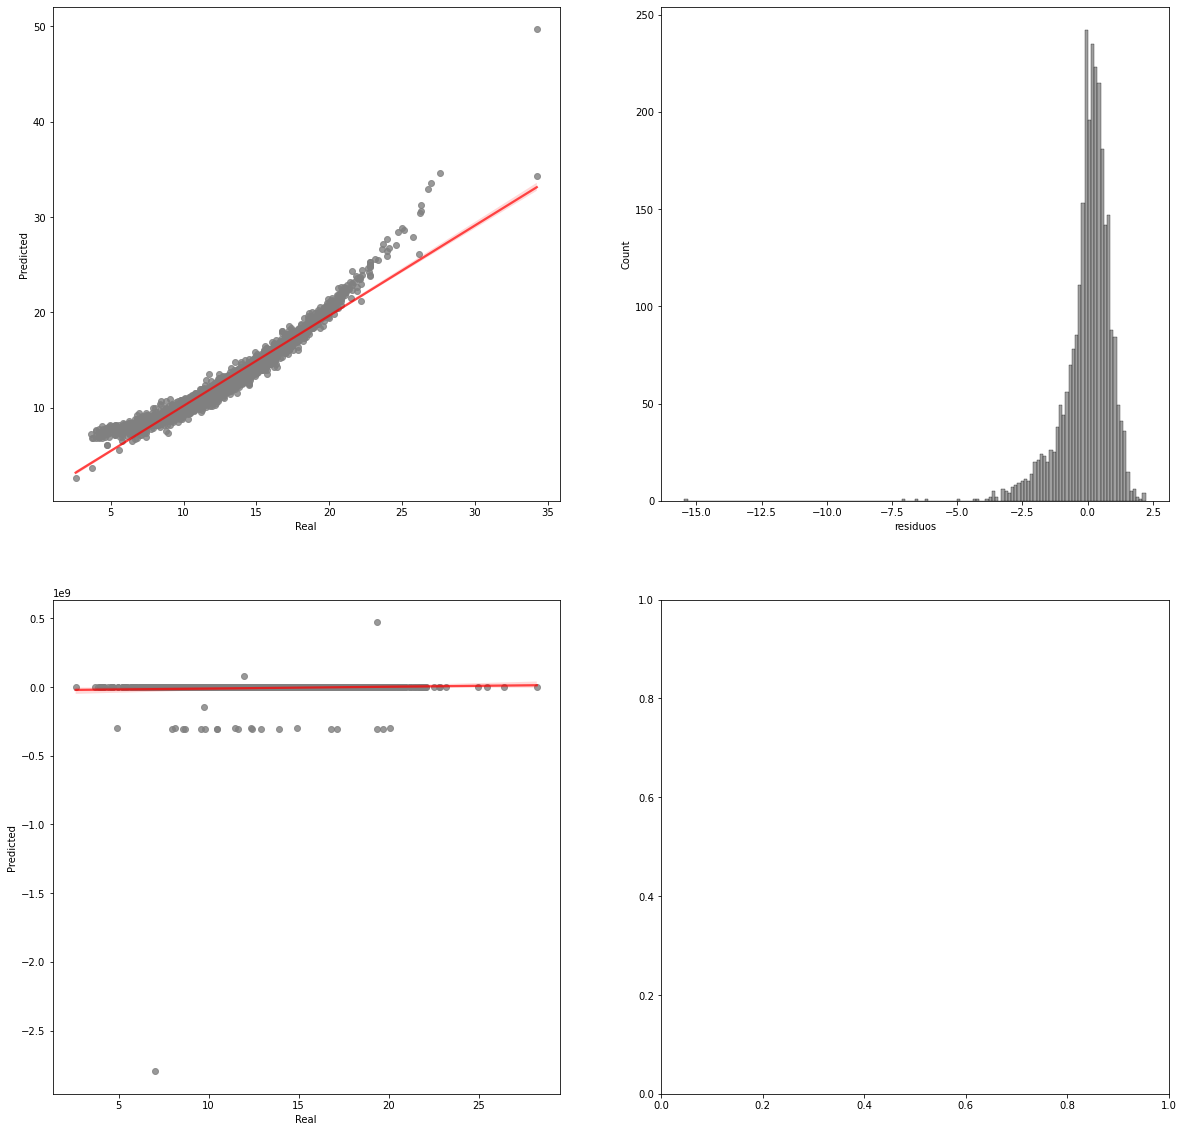

In [39]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados_dummie[resultados_dummie['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })



sns.regplot(data = resultados_dummie[resultados_dummie['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados_dummie[resultados_dummie['Set'] == "Train"],
             x="residuos",
             color ="grey",
            #  kde=True, 
             ax = ax[0,1])


sns.histplot(resultados_dummie[resultados_dummie['Set'] == "Test"],
             x="residuos",
             color = "grey",
            #  kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");